In [2]:
import numpy as np
from PIL import Image
from numpy.linalg import norm
# import random

# read input image
def read_image():
    img = Image.open("valley.png") # import image
    img_1d = np.asarray(img) # get pixel of image
    return (img_1d / 255) # scale to make values smaller, divide by 255 so that all values are in the range [0-1]

# result of kmeans depend mostly on initiaization
# can choose forgy which is one of the faster init for kmeans
def init_centroids(img_1d, k_clusters):
    # take input img_1d (training sample) and choose k_clusters at random from img_1d
    # forgy init method: choose k_clusters at random from img_1d and uses them as the init centroids 
    # return random.sample(list(img_1d), k_clusters) # random select multi items from list(img1d), not a single item as random.choice()
    # return k centroids from the initial points of img_1d
    centroids = img_1d.copy()
    np.random.shuffle(centroids)
    return centroids[:k_clusters]

# for each training sample, find a closest centroid
# return closest centroids in index for dataset img_1d where each row is a single sample, index = Nx1 vector of centroid assignments
# an array include the index to the nearest centroid for each ponts of img_1d
def closest_centroids(img_1d, centroids, ax=1):
    index = np.zeros(len(img_1d)) # index value correspond cluster which each pixel belongs to
    for i in range(len(img_1d)):
        euclidean_distance = norm(img_1d[i] - centroids, axis=ax) # calculate euclidean distance
        index[i] = np.argmin(euclidean_distance, axis=0) # take indices of element with min distance, update index = closest centroid
    return index # return index of closest centroids for each sample 

# calculate distance of each sample to its centroid and take avg(distance) for every centroid Uk
# centroid: mean of all sample assigned to cluster
# img_1d where each row is a single data point, a vector index of centroid assignments and the number of centroids
# return matrix centroids where each row of centroids is the mean of the data point assigned to it
def calculate_centroids(img_1d, index, k_clusters):
    n = img_1d.shape[1] # take number of elements in each dimension of img_1d, n = np.size(img_1d, 1) or n = img_1d.shape
    # k_clusters is number of clusters or number of colors which were choosen
    centroids = np.zeros((k_clusters, n)) # array of assumed means of centroids
    for i in range(k_clusters): 
        ci = index==i # ci:boolean
        # ci = ci.astype(int) convert ci:boolean to ci:int to compute sum(ci)
        sample = img_1d[np.where(ci)] # np.where([[true, false], [false, true],...])
        means = [np.mean(column_sample) for column_sample in np.transpose(sample)] # transpose the sample column to row for looping to compute average
        centroids[i] = means # update each centroid correspond to avg(distance)
    return centroids # return new centroids by calculating means of data points assigned to each centroid

# each row of matrix img_1d is a single sample
# max_iters specifies the total number of interactions of kmeans to excute
# return centroids(k_clusters x n matrix of computed centroids) and index(m x 1 vector of centroid assignments)
# n = np.size(img_1d, 1), m = np.size(img_1d, 0) 
def Kmeans(img_1d, k_clusters, max_iters, initial_centroids):
    centroids = initial_centroids # it's important to init centroids randomly when using kmeans
    for i in range(max_iters):
        index = closest_centroids(img_1d, centroids) # for each sample in matrix img_1d, assign it to the closest centroid
        centroids = calculate_centroids(img_1d, index, k_clusters) # given the memberships, compute new centroids
    return centroids, index

def main():
    # image = read_image() # take input image
    # img_size = image.shape # get size of image
    # img_1d = image.reshape(img_size[0] * img_size[1], 3) # reshape image into Nx3 matrix where N = number of pixels, each row contain R,G,B pixel values
    # k_clusters = 3 # number of color in the compress image
    # max_iters = 20
    # initial_centroids = init_centroids(img_1d, k_clusters)
    # color_centroids, cluster_index = Kmeans(img_1d, k_clusters, max_iters, initial_centroids)
    # print("Centroids: ", np.shape(color_centroids))
    # print("Labels: ", np.shape(cluster_index))
    image = read_image() 
    width, height, num_channels = image.shape
    img_1d = image.reshape((width * height, num_channels))
    k_clusters = 3 # number of color in the compress image
    max_iters = 10 # default value of max number of iterations is 10
    initial_centroids = init_centroids(img_1d, k_clusters)
    color_centroids, cluster_index = Kmeans(img_1d, k_clusters, max_iters, initial_centroids)
    index = closest_centroids(img_1d, color_centroids) # take index of closest centroids
    index = np.array(index, dtype=np.uint8) # convert np.array of float64 to uint8
    # recorved image by substituting the color index and reshape image back to its original dimensions
    # scale by 255 because we've divided 255 before
    img_1d_recorved = np.array(color_centroids[index, :] * 255, dtype=np.uint8).reshape((width, height, num_channels))
    # compressed_image = Image.fromarray(img_1d_recorved) # convert raw numbers back to image
    # compressed_image.save('valley_compress3.png') # save image
    print("Centroids with k = 3: ", np.shape(color_centroids))
    print("Labels with k = 3: ", np.shape(cluster_index))
    k_clusters1 = 5
    color_centroids1, cluster_index1 = Kmeans(img_1d, k_clusters1, max_iters, initial_centroids)
    print("Centroids with k = 5: ", np.shape(color_centroids1))
    print("Labels with k = 5: ", np.shape(cluster_index1))
    k_clusters2 = 7
    color_centroids2, cluster_index2 = Kmeans(img_1d, k_clusters2, max_iters, initial_centroids)
    print("Centroids with k = 7: ", np.shape(color_centroids2))
    print("Labels with k = 7: ", np.shape(cluster_index2))
    
if __name__ == '__main__':
    main()

Centroids with k = 3:  (3, 3)
Labels with k = 3:  (50232,)
Centroids with k = 5:  (5, 3)
Labels with k = 5:  (50232,)
Centroids with k = 7:  (7, 3)
Labels with k = 7:  (50232,)


Text(0.5, 1.0, 'Original image')

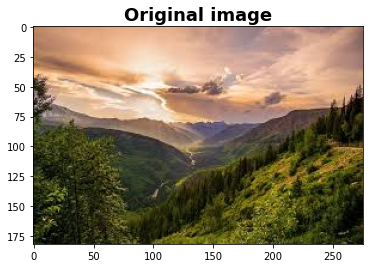

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1 = mpimg.imread("valley.png")
plt.imshow(img1)
plt.title("Original image", fontsize=18, fontweight='bold')

Text(0.5, 1.0, 'Image with k = 3')

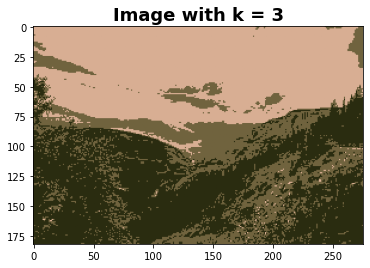

In [40]:
img2 = mpimg.imread("valley_compress1.png")
plt.imshow(img2)
plt.title("Image with k = 3", fontsize=18, fontweight='bold')

Text(0.5, 1.0, 'Image with k = 5')

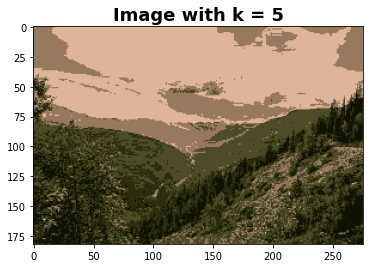

In [41]:
img3 = mpimg.imread("valley_compress2.png")
plt.imshow(img3)
plt.title("Image with k = 5", fontsize=18, fontweight='bold')

Text(0.5, 1.0, 'Image with k = 7')

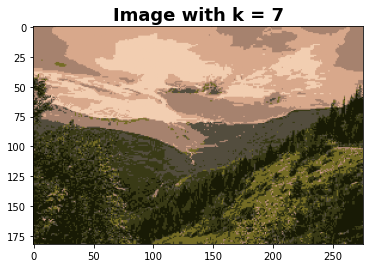

In [42]:
img4 = mpimg.imread("valley_compress3.png")
plt.imshow(img4)
plt.title("Image with k = 7", fontsize=18, fontweight='bold')